In [180]:
# Imports
import pandas as pd
import numpy as np
import ssl
import matplotlib.pyplot as plt

%matplotlib inline

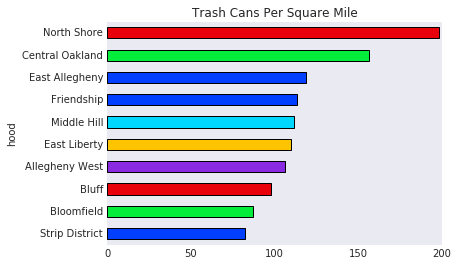

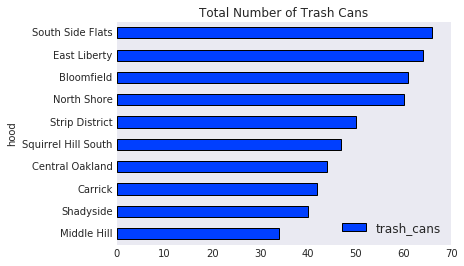

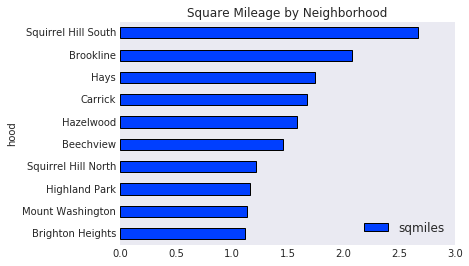

In [181]:
# Loading Data into Jupyterhub
pgh_trash_data = pd.read_csv("https://data.wprdc.org/datastore/dump/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9")
pgh_neighborhood_data = pd.read_csv("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.csv")

# Organize Data by neighborhood
trash_by_neighborhood = pgh_trash_data['neighborhood'].value_counts()
pgh_sqmiles = pgh_neighborhood_data['sqmiles']
pgh_hoods = pgh_neighborhood_data['hood']

# Convert Series to Dataframe
trash_by_neighborhood_frame = trash_by_neighborhood.to_frame()
pgh_sqmiles_frame = pgh_sqmiles.to_frame()
pgh_hoods_frame = pgh_hoods.to_frame()

# Rename columns to allow for merging
trash_by_neighborhood_frame.reset_index(inplace=True)
trash_by_neighborhood_frame.rename(columns = {'index':'hood', 'neighborhood':'trash_cans'}, inplace=True)

# Merge data togehter
sqmiles_by_neighborhood = pgh_hoods_frame.join(pgh_sqmiles_frame)
trash_and_sqmiles_by_hood = pd.merge(sqmiles_by_neighborhood, trash_by_neighborhood_frame)

# Calculate the ratio of trash cans to square miles
data = trash_and_sqmiles_by_hood['trash_cans'] / trash_and_sqmiles_by_hood['sqmiles']
data_frame = data.to_frame()
data_frame.columns = ['ratio']
overall_data = trash_and_sqmiles_by_hood.join(data_frame)
overall_data.rename(columns = {'Unnamed':'ratio'}, inplace=True)
overall_data = overall_data.set_index('hood')

# Filter
    # Filtering ratios
trimmed_data = overall_data[overall_data.ratio >= 82]
trimmed_data = trimmed_data.sort_values(by='ratio')

    # Filtering trash can totals
trimmed_trash = trash_by_neighborhood_frame[trash_by_neighborhood_frame.trash_cans >= 34]
trimmed_trash = trimmed_trash.sort_values(by='trash_cans')
trimmed_trash = trimmed_trash.set_index('hood')

    # Filtering square milage
trimmed_sqmiles = sqmiles_by_neighborhood[sqmiles_by_neighborhood.sqmiles >= 1.1]
trimmed_sqmiles = trimmed_sqmiles.sort_values(by='sqmiles')
trimmed_sqmiles = trimmed_sqmiles.set_index('hood')

# Print data
plt.style.use('seaborn-bright')
    # List of Ratios
trimmed_data['ratio'].plot.barh(title='Trash Cans Per Square Mile')
    # List of Trash Cans
trimmed_trash.plot.barh(title='Total Number of Trash Cans')
    # List of Square Miles
trimmed_sqmiles.plot.barh(title='Square Mileage by Neighborhood')